# To solve this lab, I start from the work done in the previous lab (lab-cleaning-numerical-data). At the end of the previous one, in the cell #14, I start this lab-clening-categorical-data.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
customer_df.columns = [columns_name.lower() for columns_name in customer_df.columns]
customer_df.columns = [columns_name.replace(' ', '_') for columns_name in customer_df.columns]
customer_df = customer_df.set_index('customer')
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premi

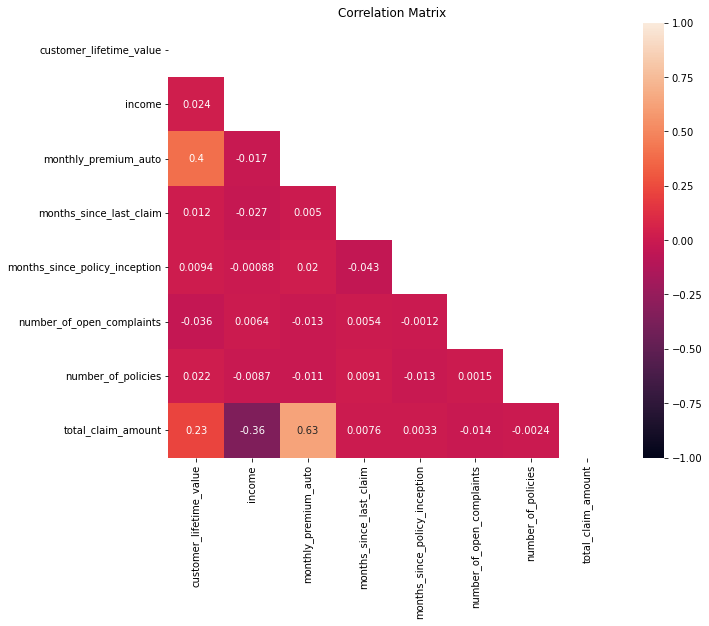

In [8]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(customer_df.corr(), dtype=bool))
sns.heatmap(customer_df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix does not show a high correlation (greather than 0.9) between any of the features and the target variable ('total_claim_amount'). The highest correlation is in between 'monthly_premium_auto' and the target, and it is uderstandable/expected to have some kind of dependecy or correlation in between these two, because the premium someone pays for their auto does indeed influence the amount they will eventually claim if they have to.

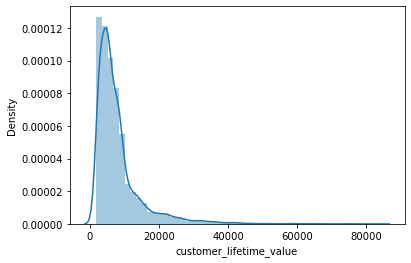

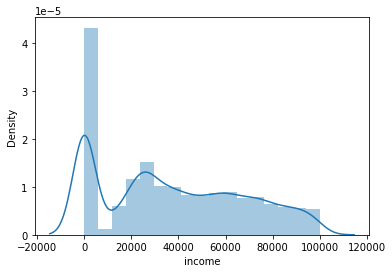

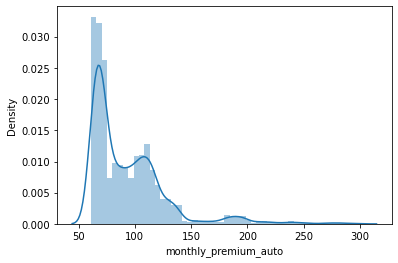

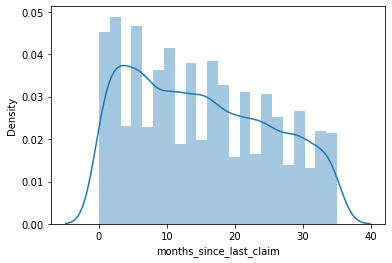

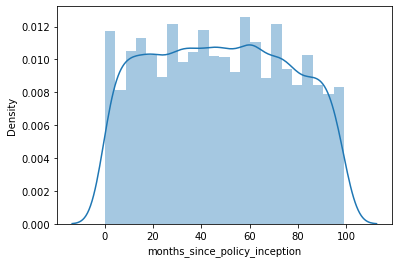

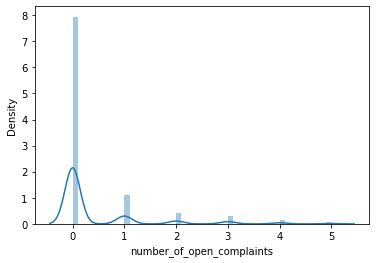

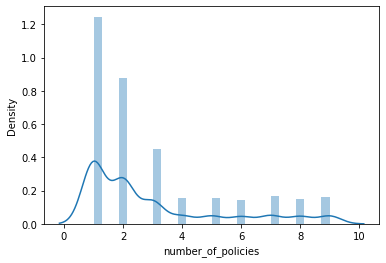

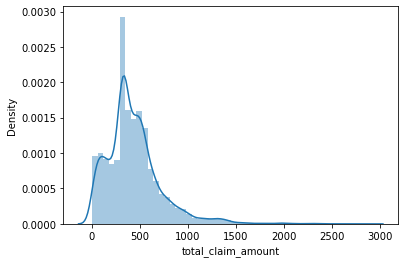

In [9]:
numerical_df = customer_df.select_dtypes(np.number)
for col in numerical_df:
    sns.distplot(customer_df[col])
    plt.show()

I do not see anything to remark. The only plot that could look more or less similar to a normal distribution is the one of 'months_since_policy_inception', but it is still far from being a normal distribution. The other seven I believe they reflect the reality and there is nothing suprising in them.


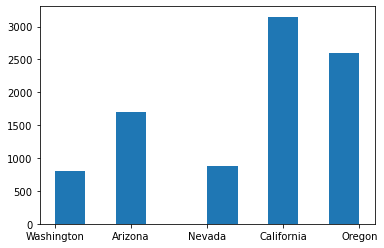

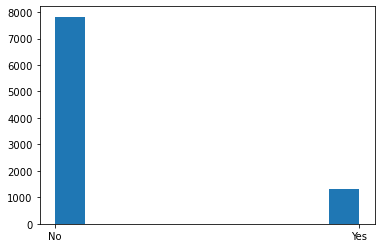

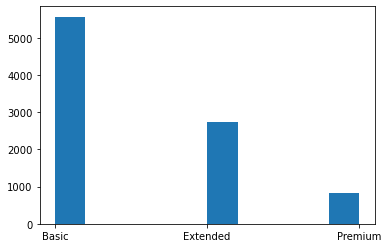

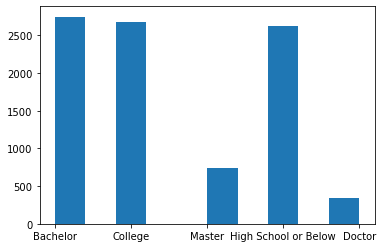

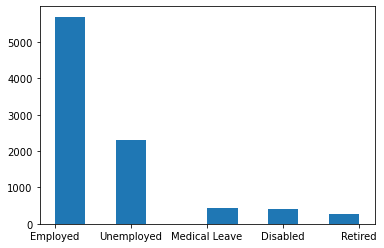

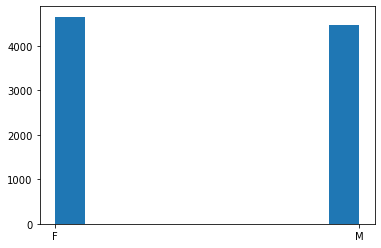

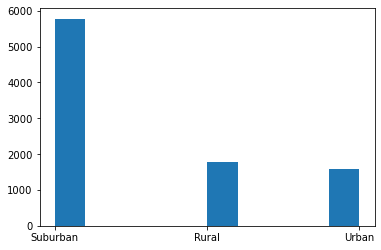

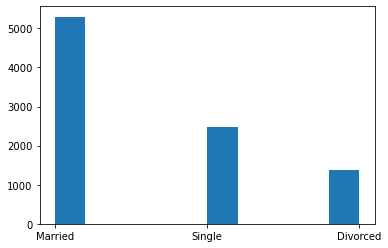

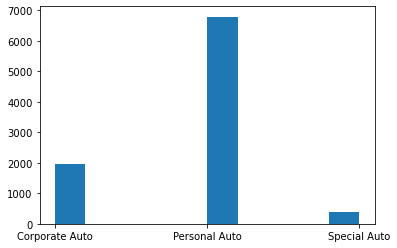

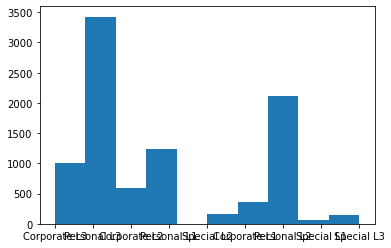

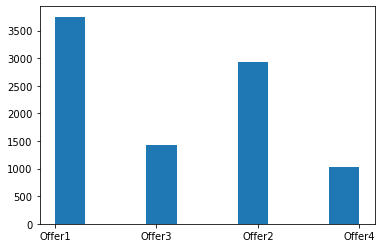

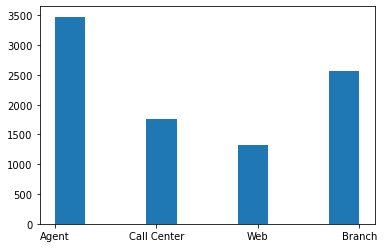

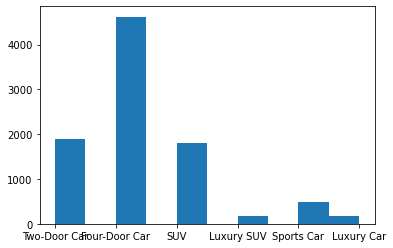

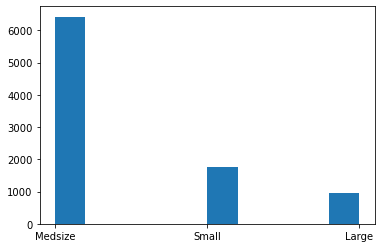

In [10]:
categorical_df = customer_df.select_dtypes(object)
for col in categorical_df:
    plt.hist(customer_df[col])
    plt.show()

I do not plot 'customer' column as it is the Customer ID, a unique identifier of each customer by which the company recognizes each customer, and we are using it as the index column. 

What I can see is that most of the customers are from "California" 'state'; the majority of the customers has "NO" as 'response'; there is preponderance toward "Basic" 'coverage'; slightly more than half of the customers have "College" or "Bachelor" 'education'; more than half of the customers are "Employed" and active; there is an equitable 'gender' balance of customers; more than half of the customers live in "Suburban" areas; more than half of the customers are "Married"; more than two-thirds of customers have coverage for a "Personal Auto"; the majority of customers have a "Personal" 'policy'; more than one-third of customers have the "Offer1" as 'renew_offer_type'; the majority of customers come "Agent" or "Branch" 'sales_channel'; the half of customers have a "Four-Door Car"; and most of the customers have a "Medsize" auto.

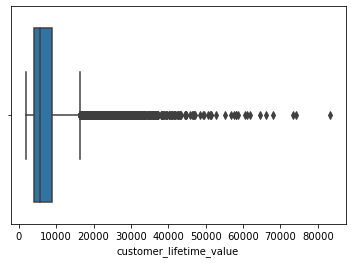

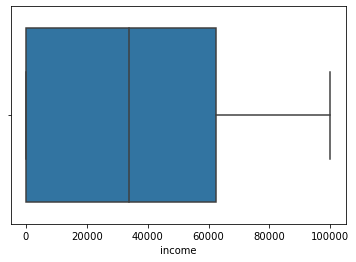

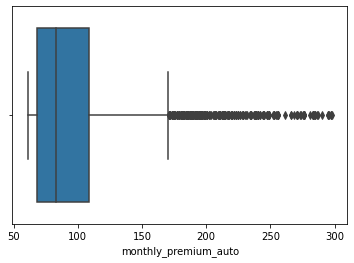

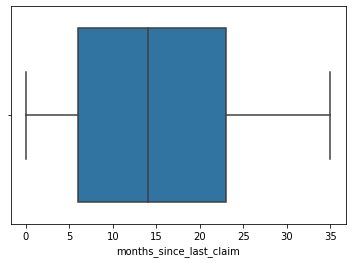

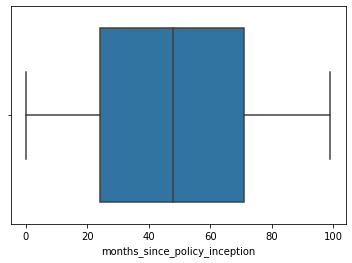

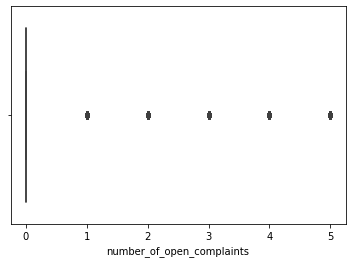

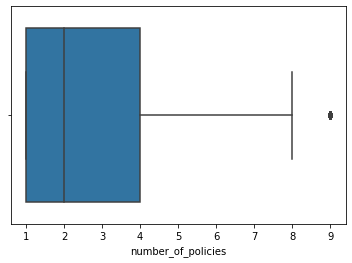

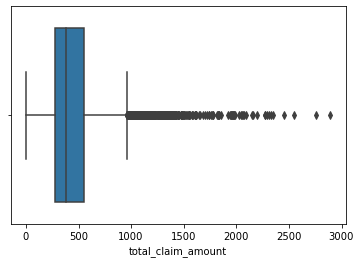

In [11]:
for col in numerical_df:
    sns.boxplot(customer_df[col])
    plt.show()

There are some outliers in features such as 'customer_lifetime_value', 'monthly_premium_auto', 'number_of_policies', but I believe it is natural and reflects the reality and circusmtances of the dataset. It is necesary to rememeber that not all people has the same standard of living, and as the categories within the categorical data reflect, some customers have Luxury SUV´s, Sport Cars, and Luxury Cars. Additionally, some customers have Corporate cars and Corporate policy types, so they are insured by their companies. All of the previously mentioned, Luxury and Corporate, usually have higher standards of living and higher policy premiums, so the outliers are natural and reflect the reality. I would proceed analyzing the data or building a model without removing them, at least initially, but taking into account that we have them in the dataset to better understand the results of the analysis or the metrics of the model. 

In [12]:
customer_df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [13]:
nulls = pd.DataFrame(customer_df.isna().sum()*100/len(customer_df), columns=['Percentage'])
nulls.sort_values('Percentage', ascending = False)

,Percentage
state,0.0
months_since_last_claim,0.0
vehicle_class,0.0
total_claim_amount,0.0
sales_channel,0.0
renew_offer_type,0.0
policy,0.0
policy_type,0.0
number_of_policies,0.0
number_of_open_complaints,0.0


We do not have nulls so we do not have to deal with that. 

# I have already: 

1. Imported the necessary libraries 
2. Loaded the CSV file
3. Solved what to do with the customer column, that is setting it as the index column
4. Divided the columns to numerical (numerical_df) and categorical (categorical_df) variables

So below I will continue with steps 5 and 6 of the lab-cleaning-categorical-data

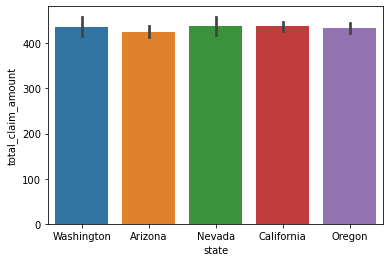

In [14]:
sns.barplot(x="state", y="total_claim_amount", data=customer_df)
plt.show()

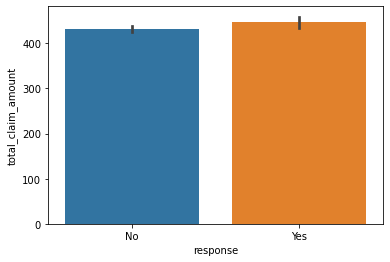

In [15]:
sns.barplot(x="response", y="total_claim_amount", data=customer_df)
plt.show()

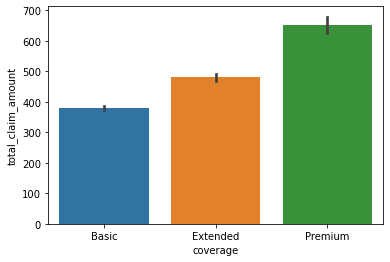

In [16]:
sns.barplot(x="coverage", y="total_claim_amount", data=customer_df)
plt.show()

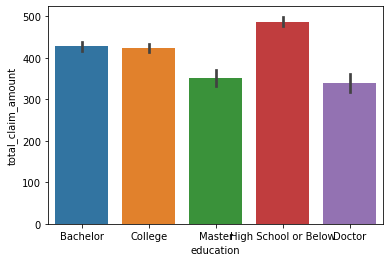

In [17]:
sns.barplot(x="education", y="total_claim_amount", data=customer_df)
plt.show()

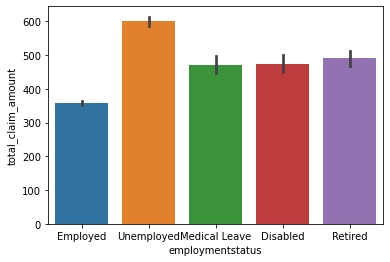

In [18]:
sns.barplot(x="employmentstatus", y="total_claim_amount", data=customer_df)
plt.show()

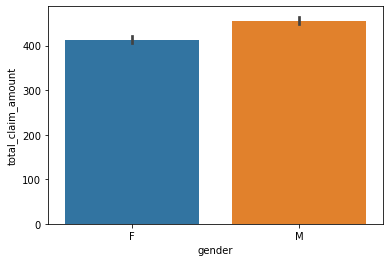

In [19]:
sns.barplot(x="gender", y="total_claim_amount", data=customer_df)
plt.show()

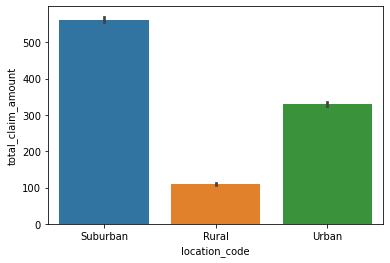

In [20]:
sns.barplot(x="location_code", y="total_claim_amount", data=customer_df)
plt.show()

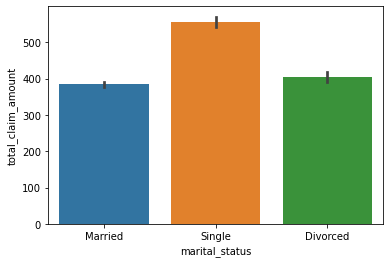

In [21]:
sns.barplot(x="marital_status", y="total_claim_amount", data=customer_df)
plt.show()

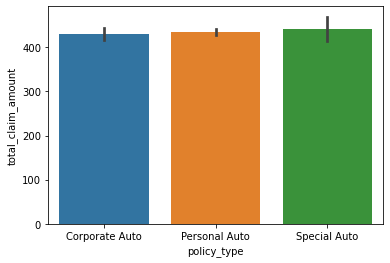

In [22]:
sns.barplot(x="policy_type", y="total_claim_amount", data=customer_df)
plt.show()

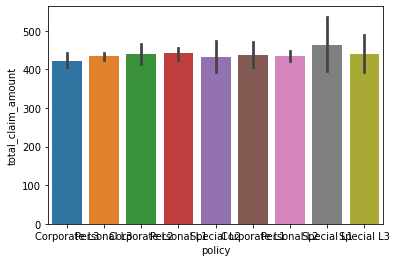

In [23]:
sns.barplot(x="policy", y="total_claim_amount", data=customer_df)
plt.show()

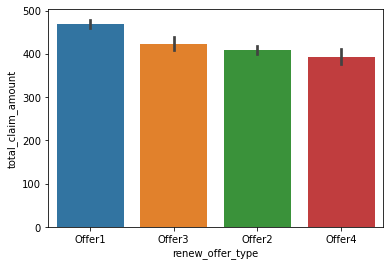

In [24]:
sns.barplot(x="renew_offer_type", y="total_claim_amount", data=customer_df)
plt.show()

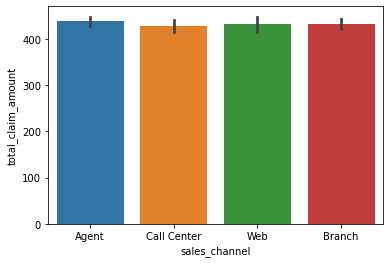

In [25]:
sns.barplot(x="sales_channel", y="total_claim_amount", data=customer_df)
plt.show()

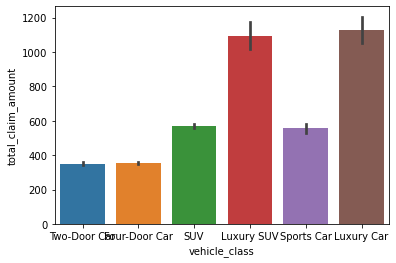

In [26]:
sns.barplot(x="vehicle_class", y="total_claim_amount", data=customer_df)
plt.show()

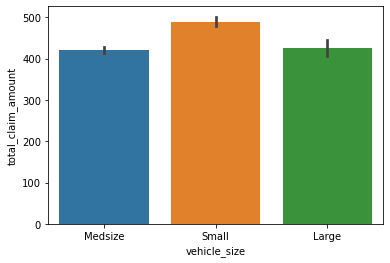

In [27]:
sns.barplot(x="vehicle_size", y="total_claim_amount", data=customer_df)
plt.show()

The main takeaways of the these last plots are that the 'total_claim_amount' is evenly distributed across the different 'states'; the 'total_claim_amount' is as well evenly distributed among the customers that have "Yes" and "No" as 'reponse'; the 'total_claim_amount' is higher  the more complete the insurance coverage is; the 'total_claim_amount' is more or less evenly distributed between customers regardless of their 'education' level; the 'total_claim_amount' is as well evenly distributed regardless of the 'employmentstatus', with a little spike among "Unemployed" customers; the 'total_claim_amount' is more or less evenly distributed among customers regardless of their 'gender'; the 'total_claim_amount' is higher the more urbanized the area where the customers live is; the 'total_claim_amount' does not substantially differ in relation with the 'marital_status' of the customers, but being higher for "Single" customers; the 'total_claim_amount' is evenly distributed among different 'policy_type(s)'; also the 'total_claim_amount' is evenly distributed among different policies; the 'total_claim_amount' is lower the higher the number of the 'renew_offer_type' is; the 'total_claim_amount' is evenly distributed among different 'sales_channel(s)'; the 'total_claim_amount' is higher for "Luxury SUV´s" and "Luxury Cars"; and that the 'total_claim_amount' is more or less evenly disributed regardless of the 'vehicle_size', but overall higher for "Small" vehicles. 

In [28]:
for i in categorical_df.columns:
    print(categorical_df[i].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595


By checking .value_counts() of each categorical column I do not identify any more data cleaning that needs to be performed. It is true that we have some imbalance in the dataset in some of the categorical features that we may want to pay attention to (SMOTE, Tomek Links) if we were going to apply a Classification model. We could even apply bucketing to the column 'policy' to reduce the number of categories within the column, or to the column 'vehicle_class' to distinguish only between high-end vehicles and regular vehicles. Nevertheless, I do not see extremely necessary to do so in this premature point of the process without first applying a model and evaluating the metrics. 